In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('expenses.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Visualizing Input Variables

In [8]:
num_cols = []
cat_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [9]:
num_cols

['age', 'bmi', 'children', 'charges']

In [10]:
cat_cols

['sex', 'smoker', 'region']

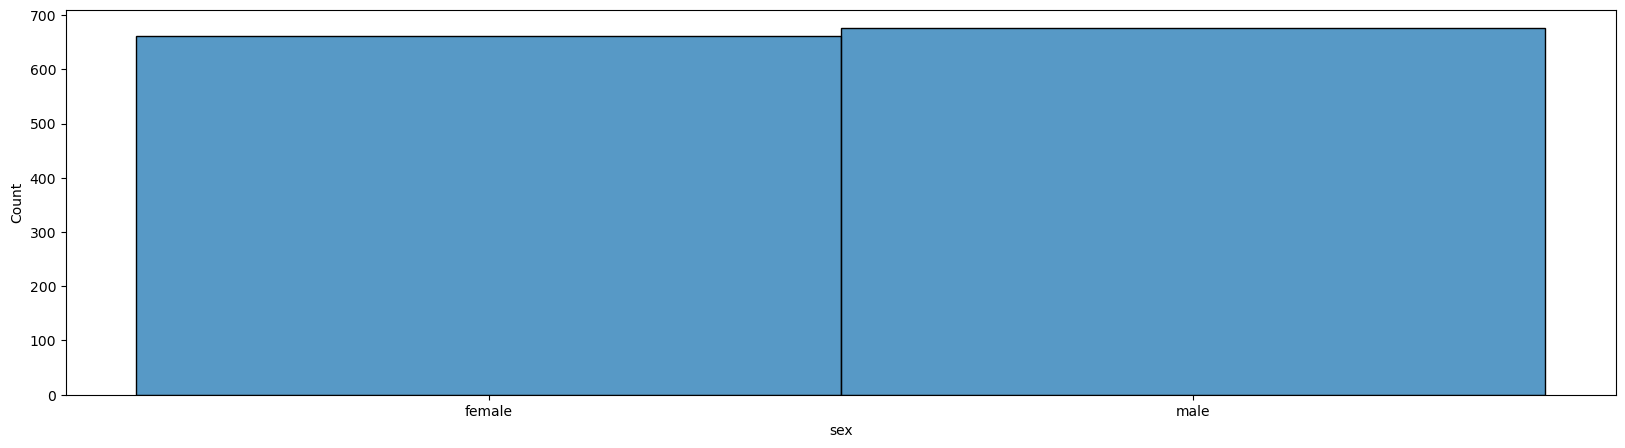

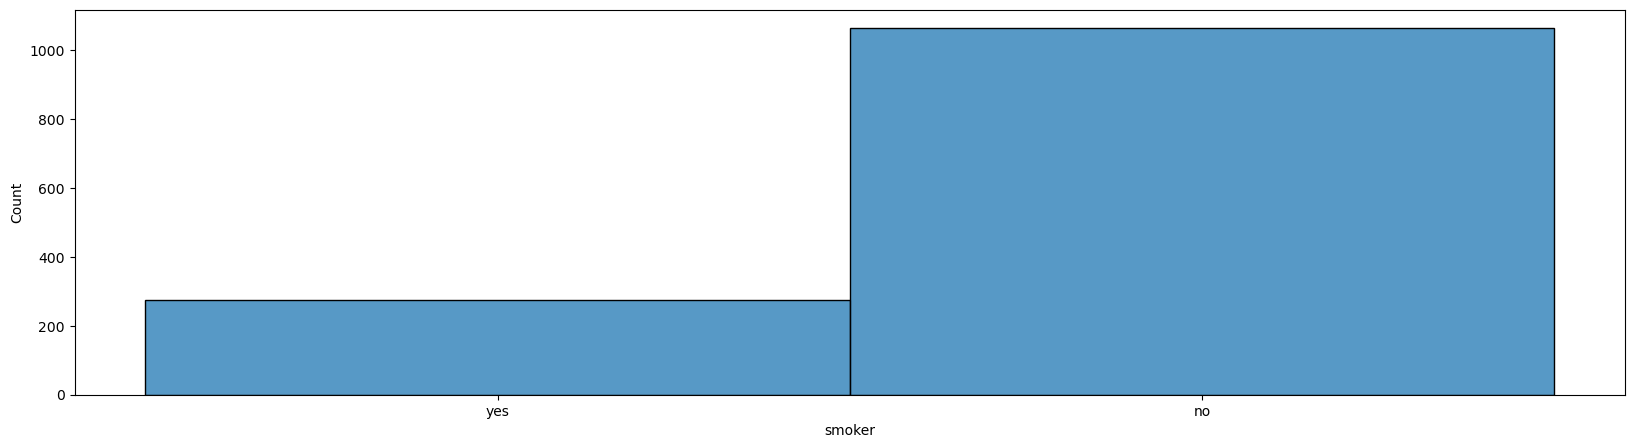

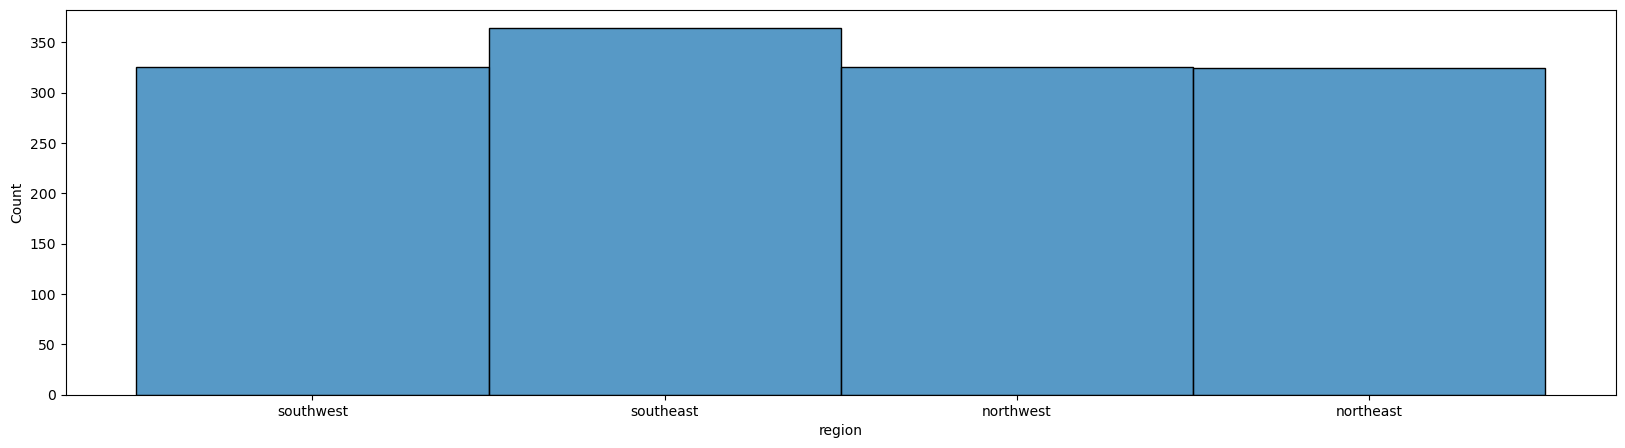

In [11]:
for col in cat_cols:
    plt.figure(figsize=(20,5))
    sns.histplot(data=df,x=col, kde=False)

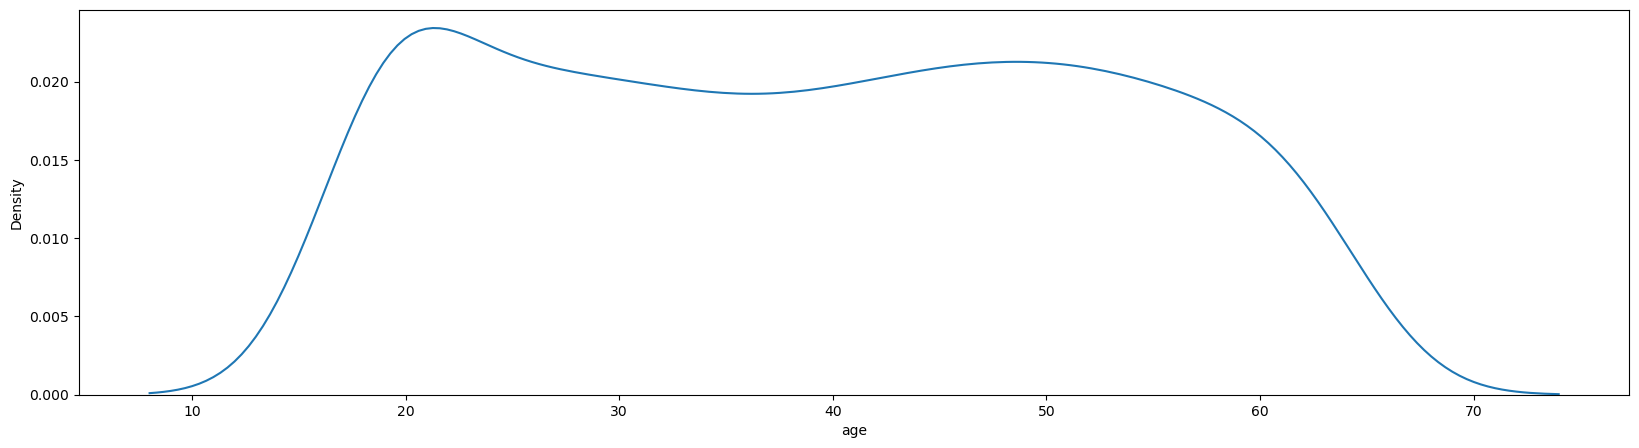

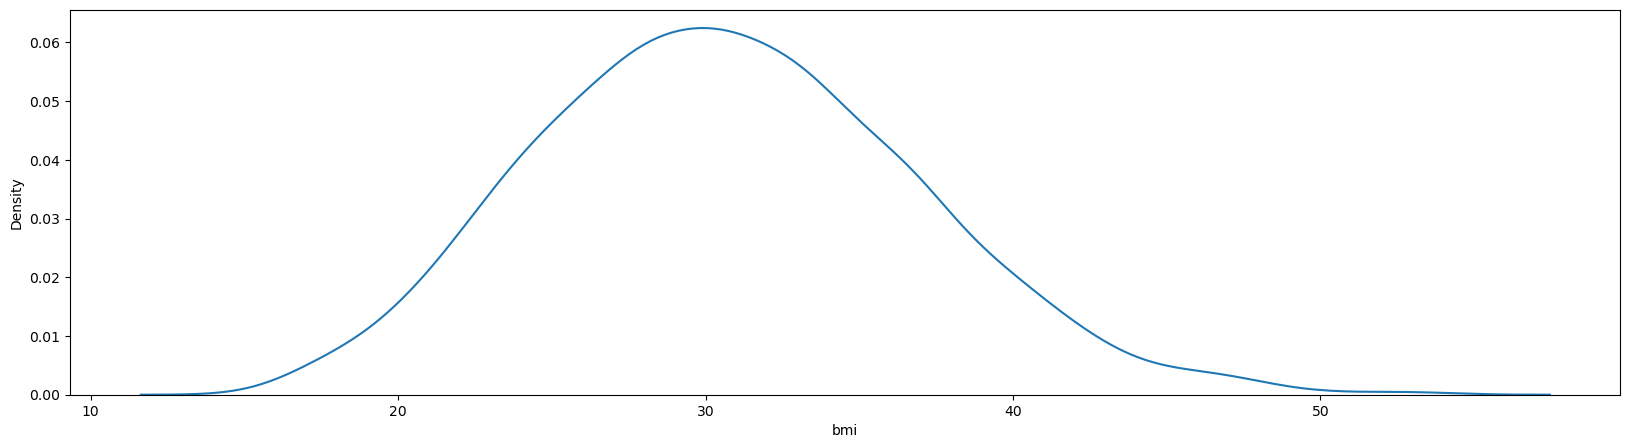

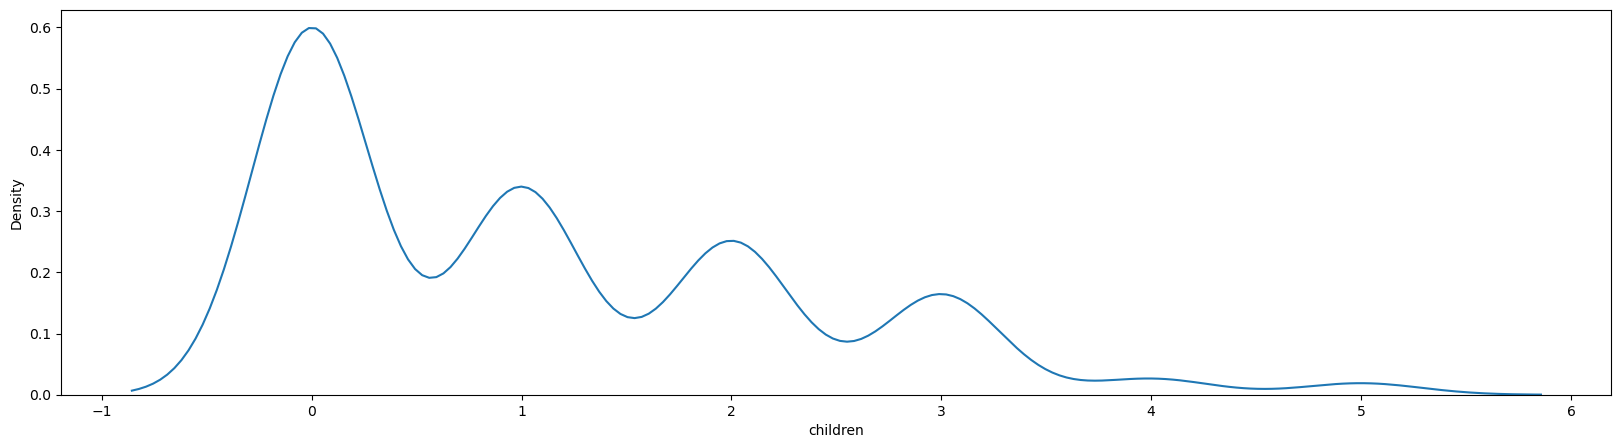

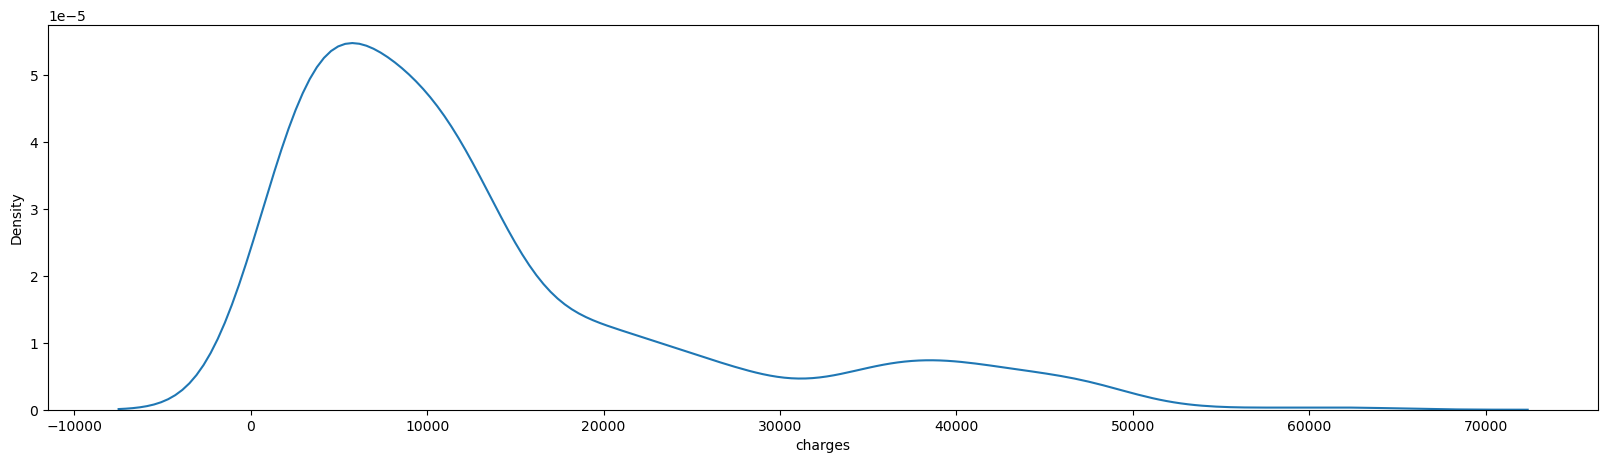

In [12]:
for col in num_cols:
    plt.figure(figsize=(20,5))
    sns.kdeplot(data=df,x=col)

## EDA

In [13]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


<Axes: xlabel='age', ylabel='Density'>

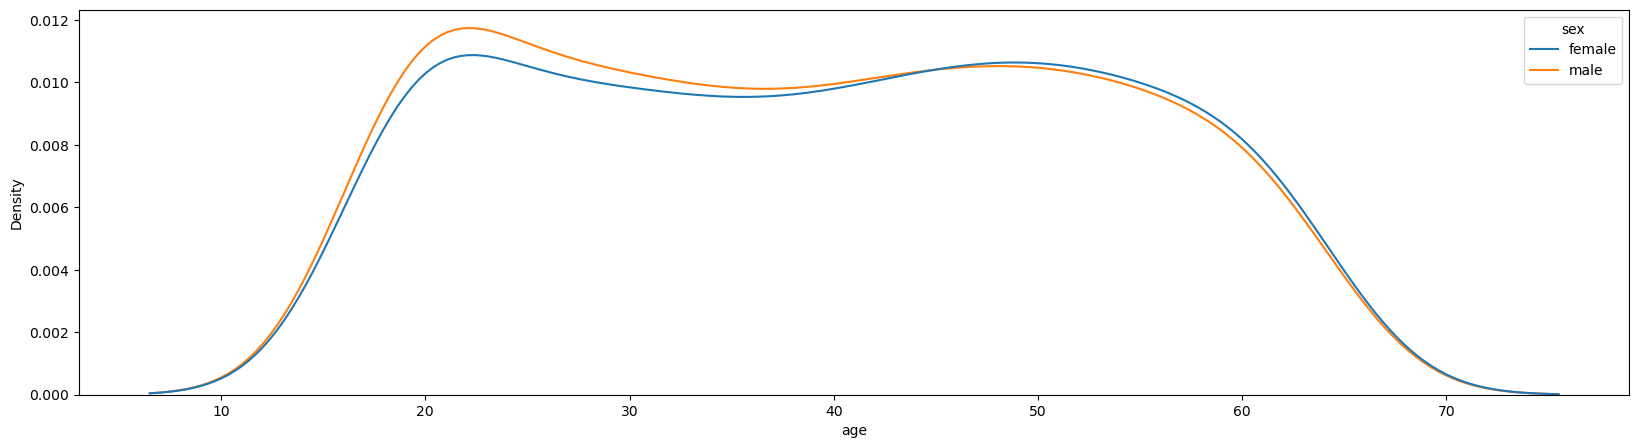

In [14]:
plt.figure(figsize=(20,5))
sns.kdeplot(data=df,x='age',hue='sex')

<Axes: xlabel='age', ylabel='bmi'>

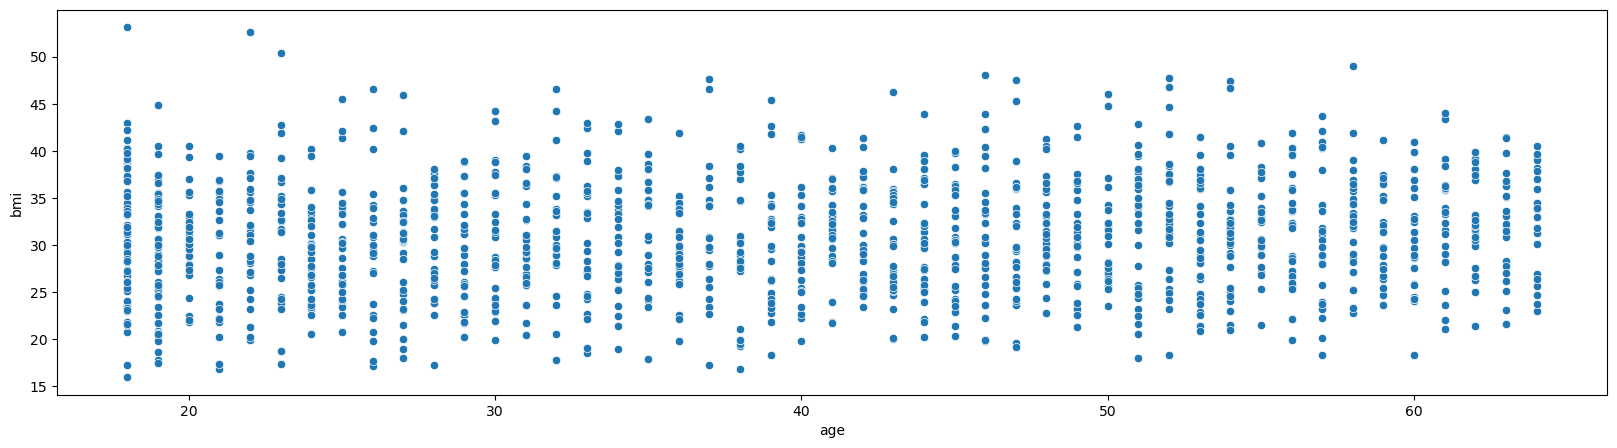

In [15]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df,x='age',y='bmi')

<Axes: xlabel='age', ylabel='Density'>

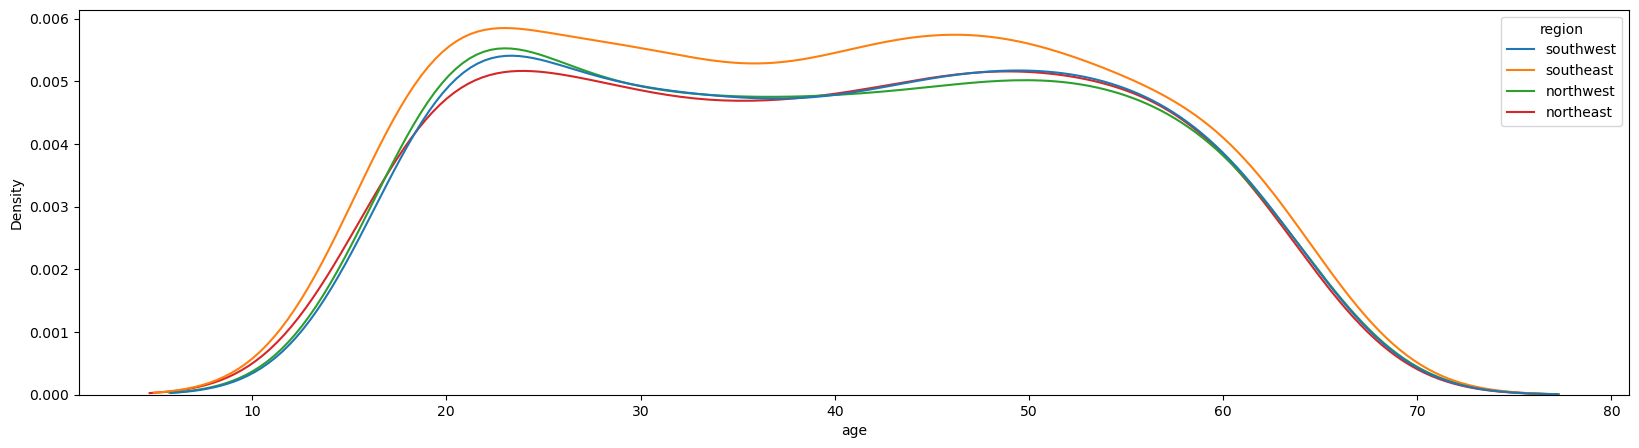

In [16]:
plt.figure(figsize=(20,5))
sns.kdeplot(data=df,x='age',hue='region')

<Axes: xlabel='age', ylabel='charges'>

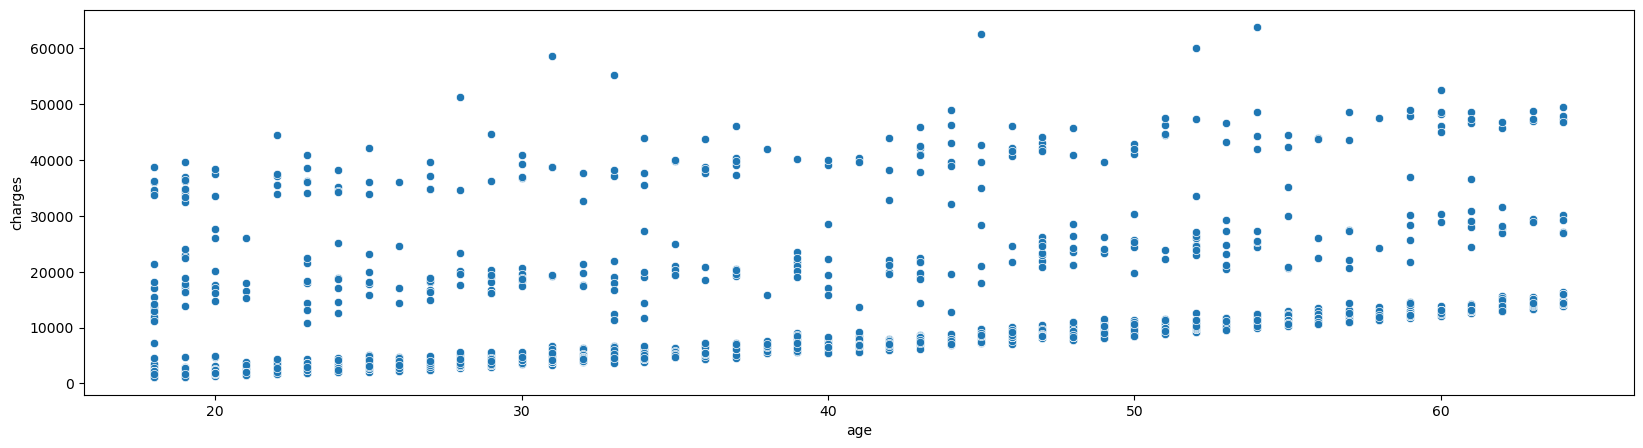

In [17]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df,x='age',y='charges')

<Axes: xlabel='bmi', ylabel='Density'>

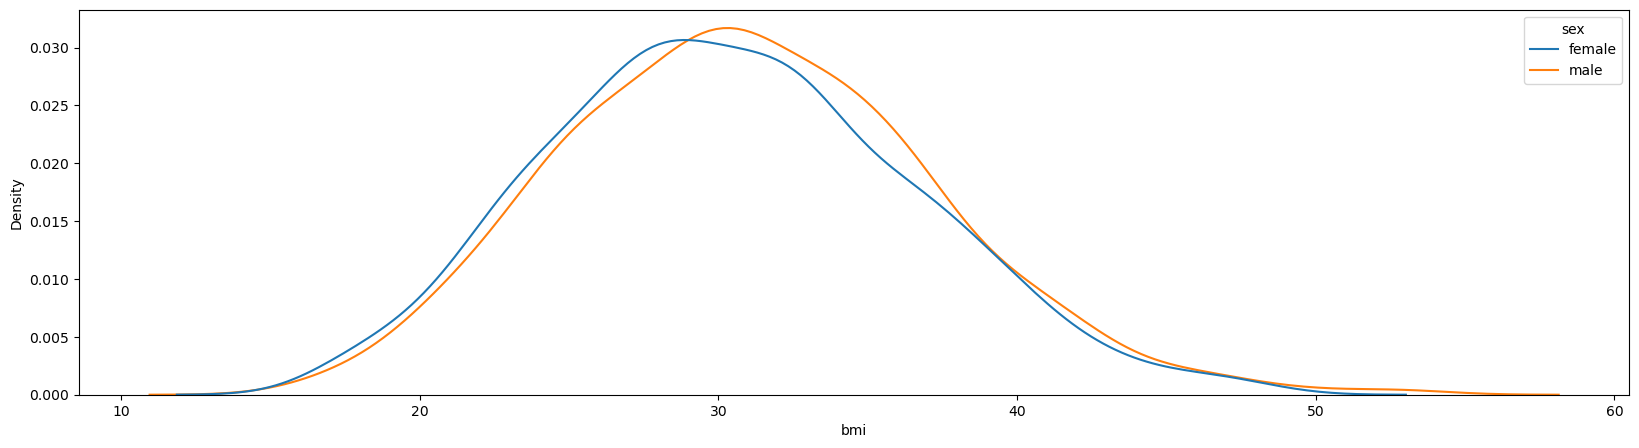

In [18]:
plt.figure(figsize=(20,5))
sns.kdeplot(data=df,x='bmi',hue='sex')

<Figure size 2000x500 with 0 Axes>

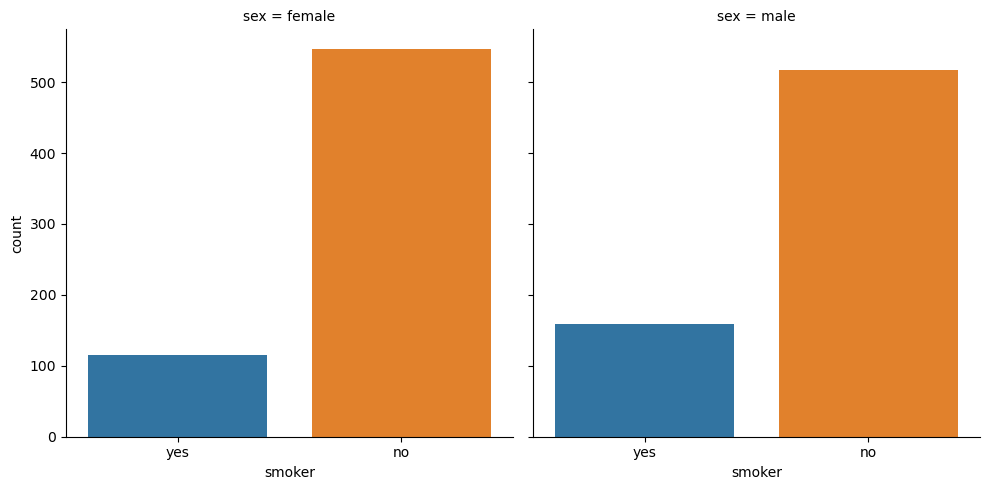

In [19]:
plt.figure(figsize=(20,5))
sns.catplot(data=df,x='smoker',col='sex',kind='count')

<Figure size 2000x500 with 0 Axes>

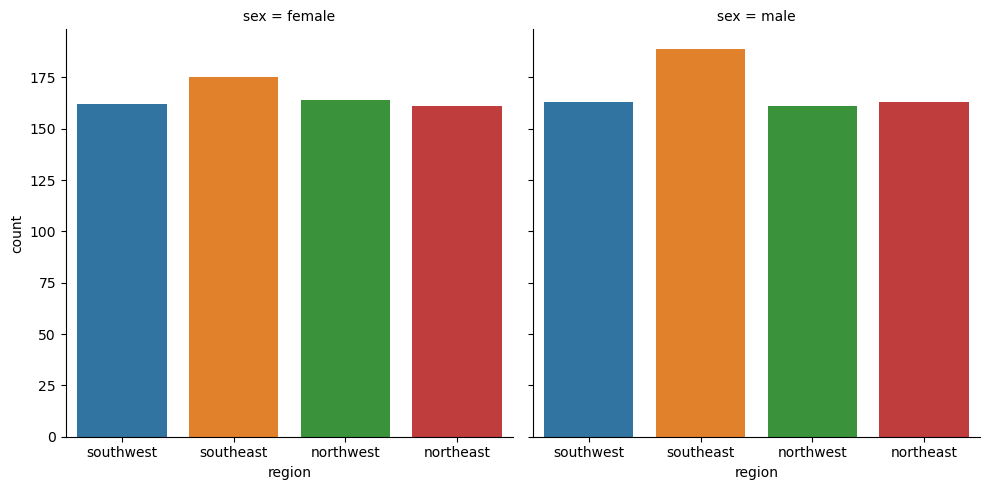

In [20]:
plt.figure(figsize=(20,5))
sns.catplot(data=df,x='region',col='sex',kind='count')

<Figure size 2000x1000 with 0 Axes>

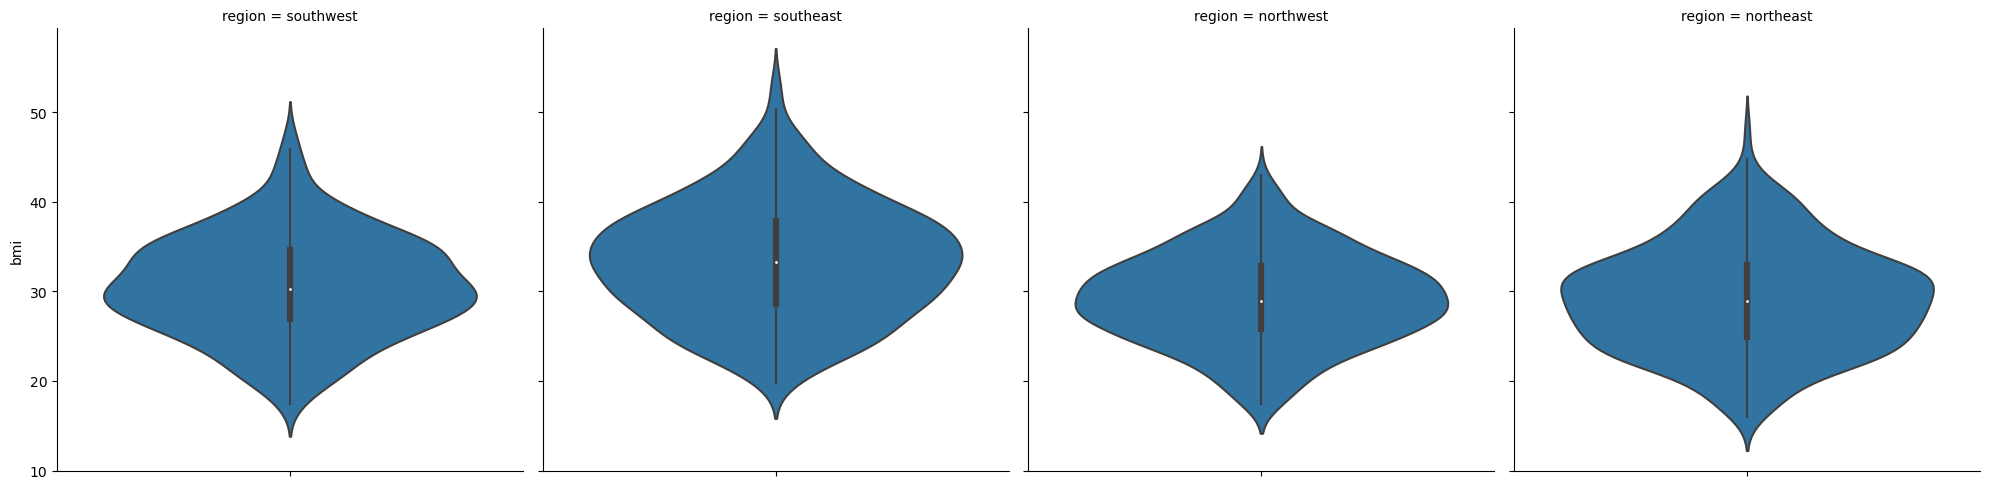

In [21]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,y='bmi',col='region',kind='violin')

<Figure size 2000x1000 with 0 Axes>

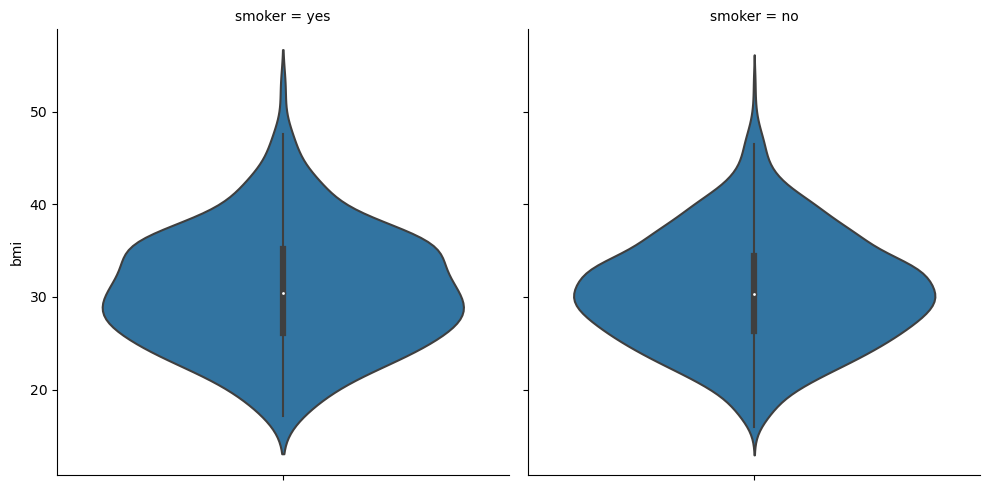

In [22]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,y='bmi',col='smoker',kind='violin')

<Figure size 2000x1000 with 0 Axes>

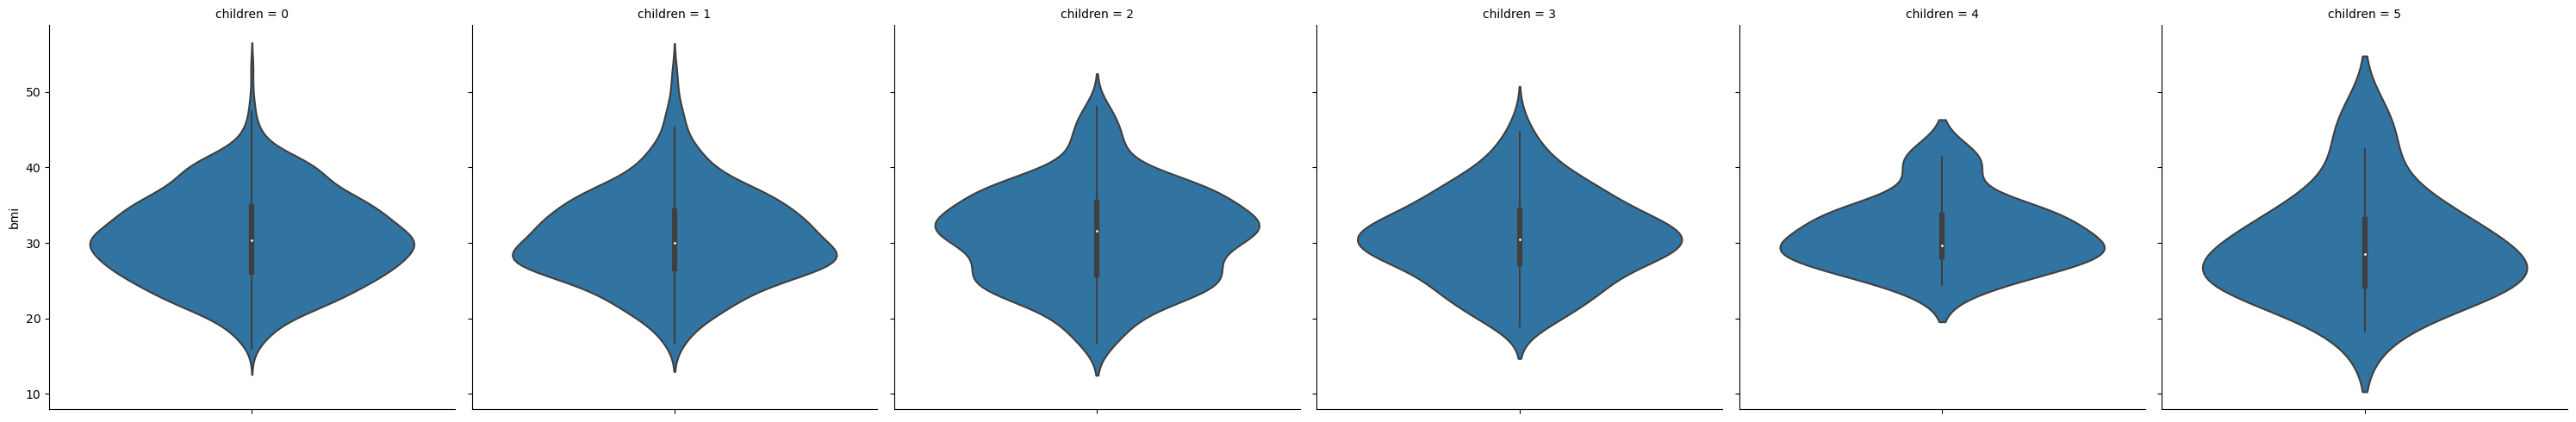

In [23]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,y='bmi',col='children',kind='violin')

<Figure size 2000x1000 with 0 Axes>

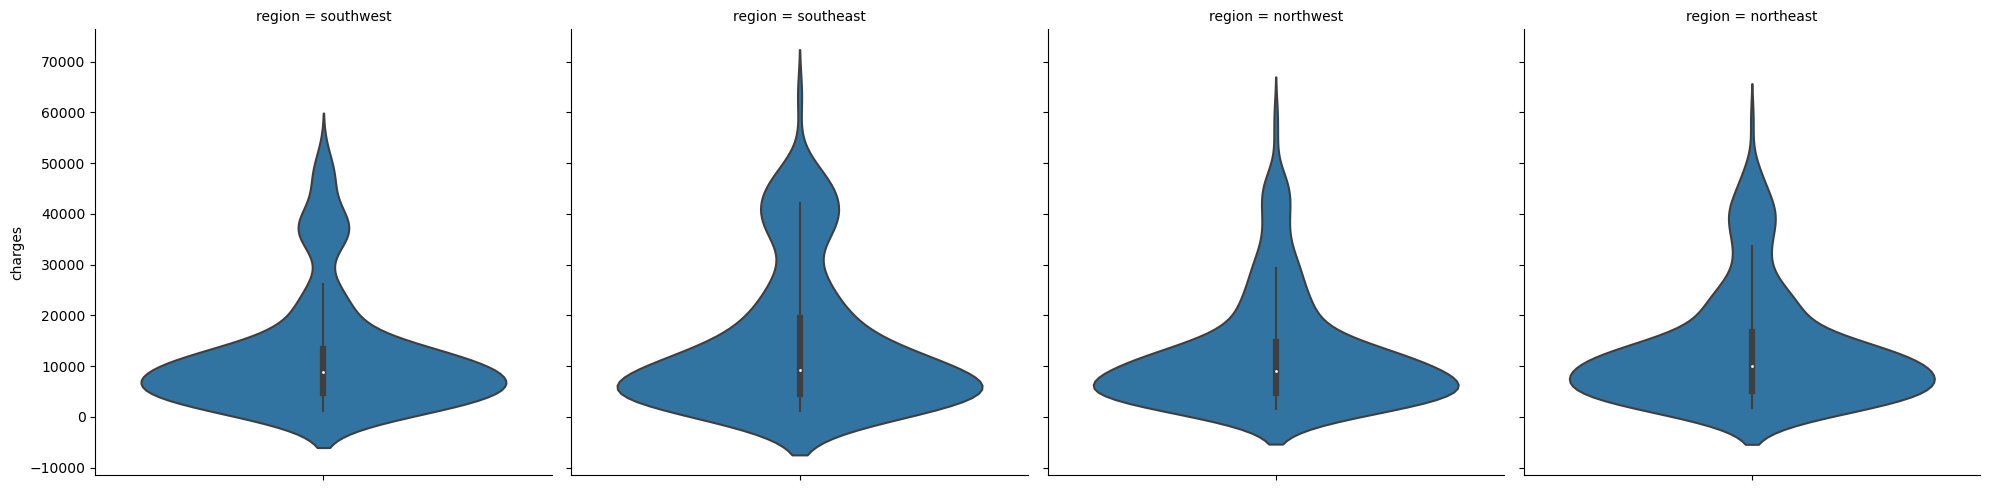

In [24]:
plt.figure(figsize=(20,10))
sns.catplot(data=df,y='charges',col='region',kind='violin')

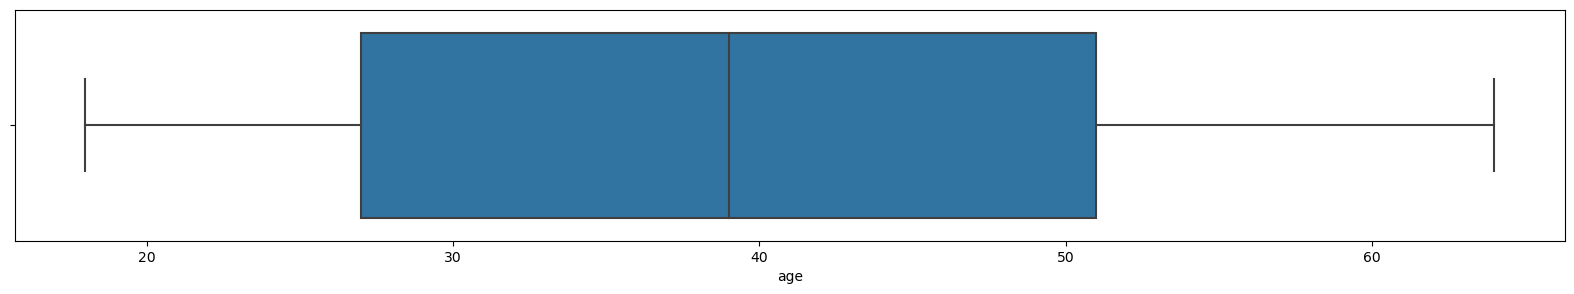

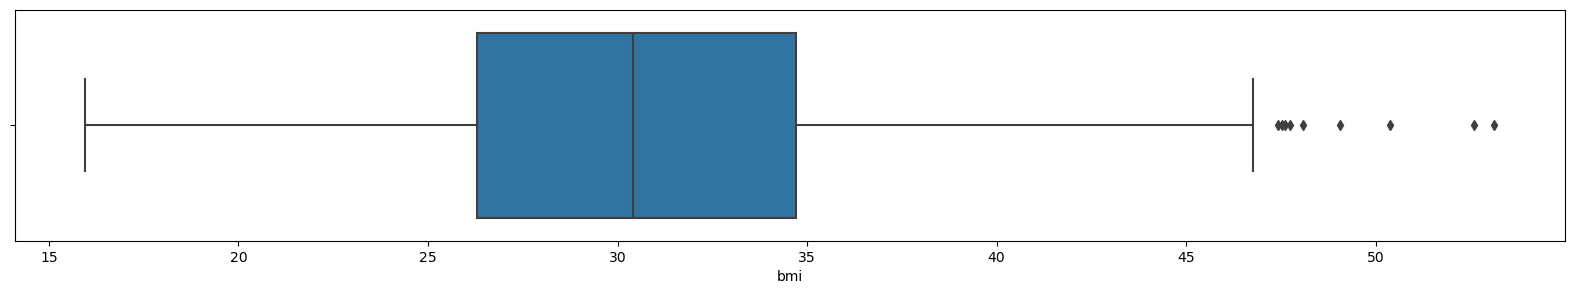

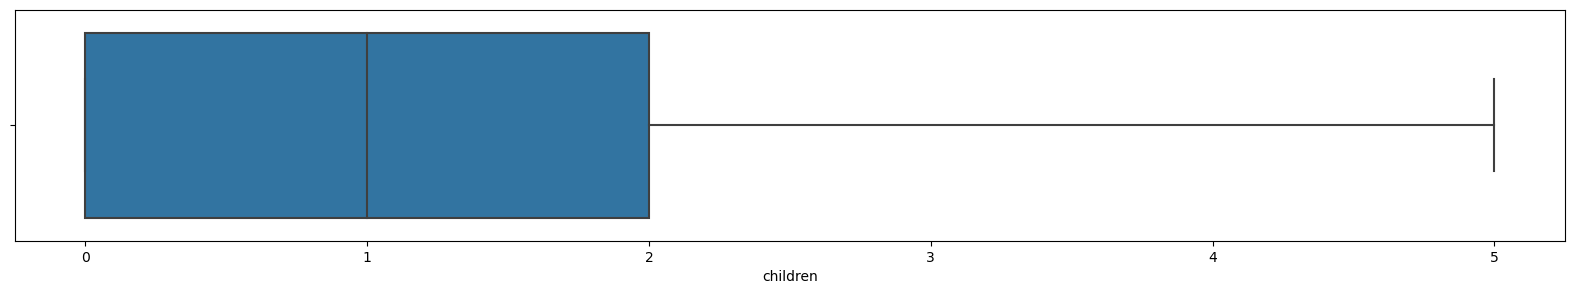

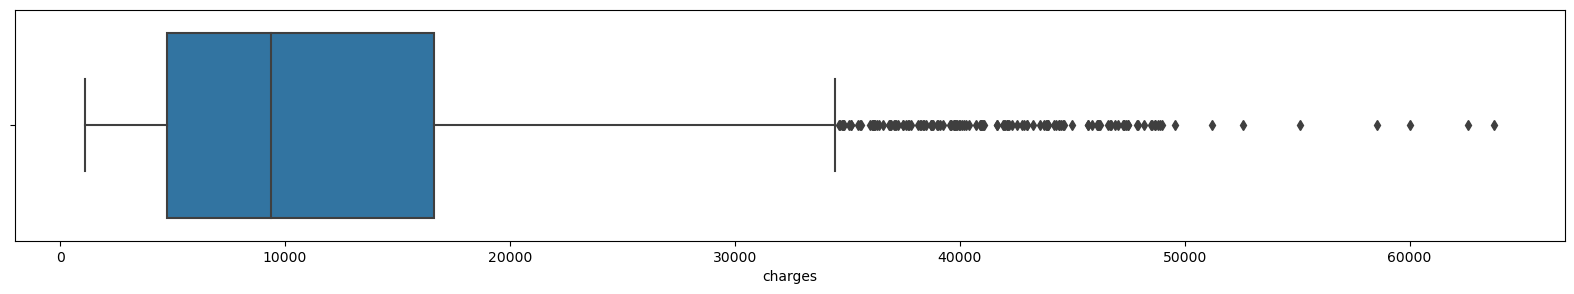

In [25]:
for col in num_cols:
    plt.figure(figsize=(20,3))
    sns.boxplot(data=df,x=col)

We should analyzie specific values for bmi and charges in order to determine if they are outliers

In [26]:
df[df['bmi'] > 50]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [27]:
df[df['charges'] > 50000].sort_values('charges',ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914


## Develop Model

In [28]:
for col in cat_cols:
    temp = pd.get_dummies(df[col])
    df.drop(col,axis=1,inplace=True)
    df = pd.concat([df,temp],axis=1)

In [29]:
df.head(5)

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
X = df.drop('charges',axis=1)
y = df['charges']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
ln_reg = LinearRegression()
ls_reg = Lasso()
rg_reg = Ridge()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [34]:
regressors = [ln_reg,ls_reg,rg_reg,dt_reg,rf_reg]

the train set mean squared error for LinearRegression() is 37701533.128629126
the test set mean squared error for LinearRegression() is 31827950.22952384
the train r2 score for LinearRegression() is 0.7370262574551634
the test r2 score for LinearRegression() is 0.7999876970680433
the train set mean squared error for Lasso() is 37701562.245873936
the test set mean squared error for Lasso() is 31834146.47198663
the train r2 score for Lasso() is 0.7370260543580953
the test r2 score for Lasso() is 0.79994875881674
the train set mean squared error for Ridge() is 37702290.213135935
the test set mean squared error for Ridge() is 31855858.252530932
the train r2 score for Ridge() is 0.7370209766792994
the test r2 score for Ridge() is 0.7998123182606847
the train set mean squared error for DecisionTreeRegressor() is 244239.55438233944
the test set mean squared error for DecisionTreeRegressor() is 46275045.16385738
the train r2 score for DecisionTreeRegressor() is 0.9982963931606104
the test r2 s

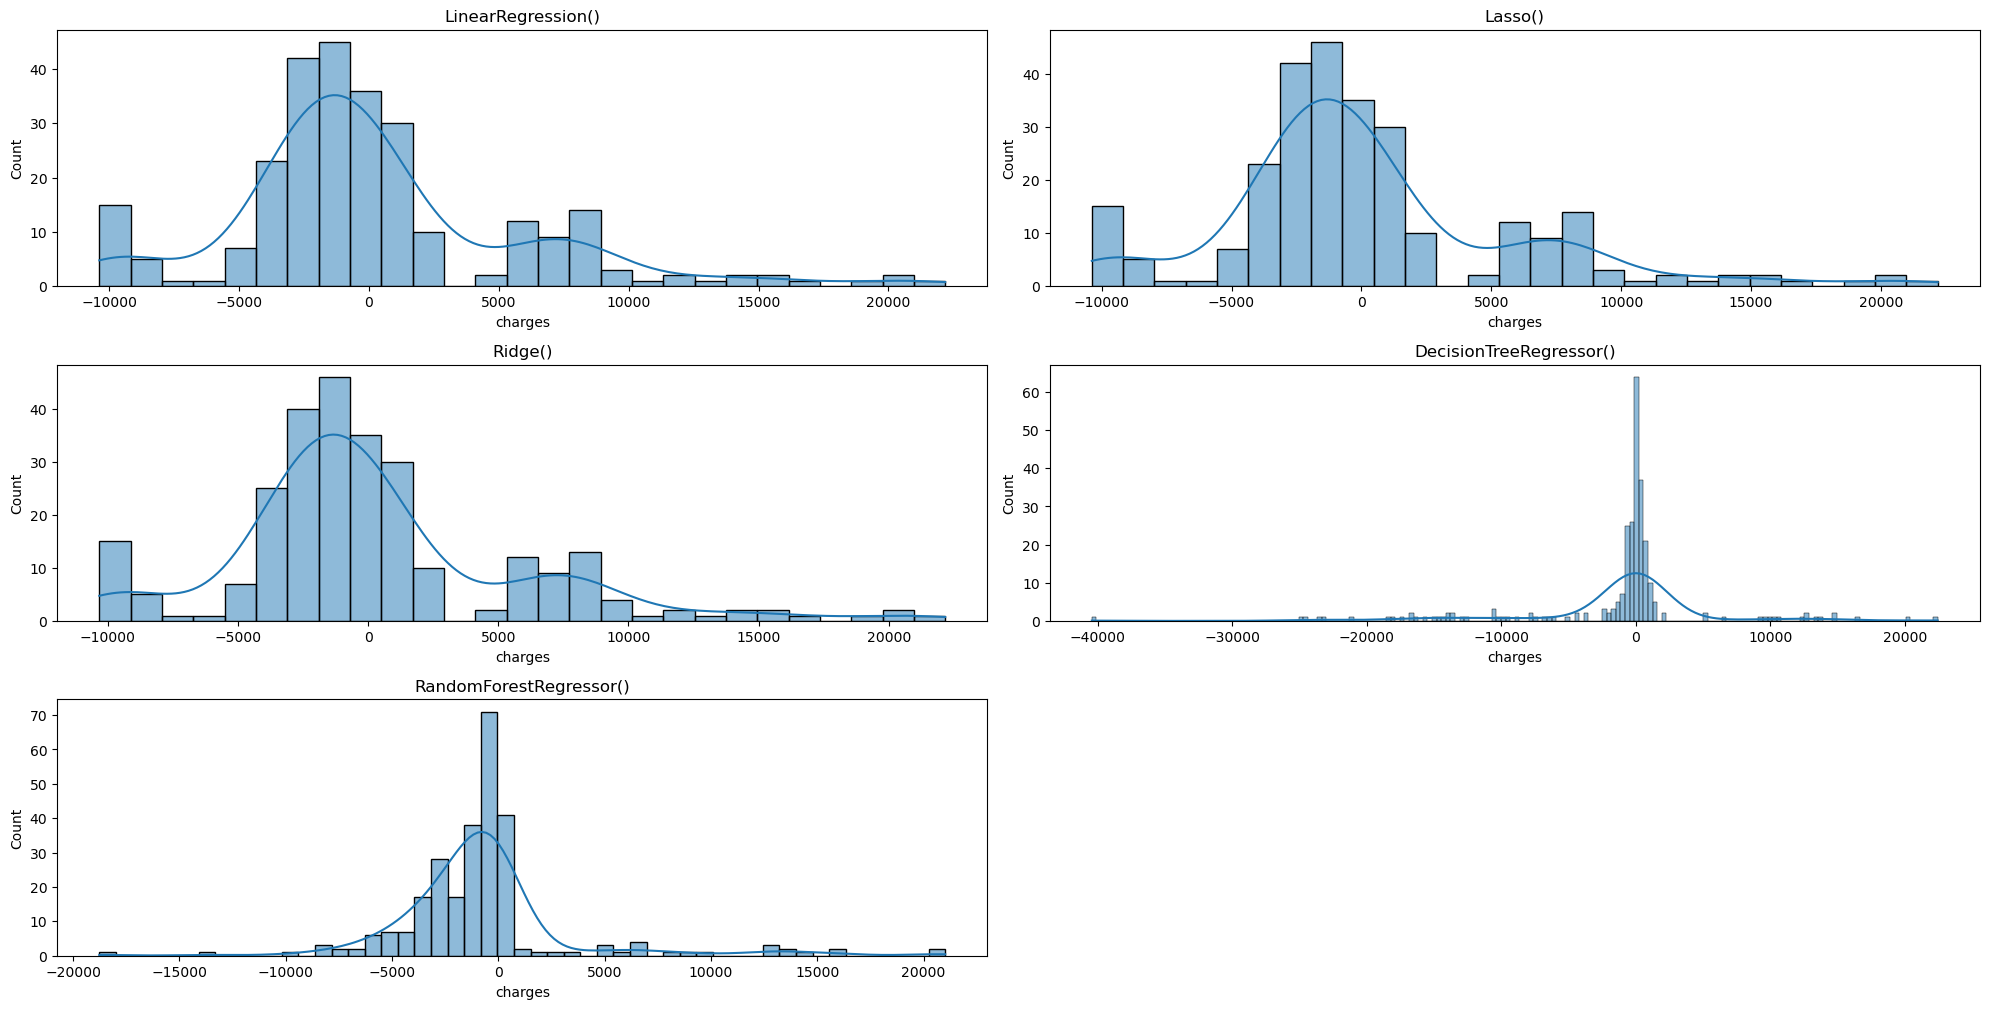

In [35]:
plt.figure(figsize=(20,10))
for i,regressor in enumerate(regressors):
    regressor.fit(x_train,y_train)
    pred1 = regressor.predict(x_train)
    pred2 = regressor.predict(x_test)
    print("the train set mean squared error for",regressor,"is",mean_squared_error(y_train,pred1))
    print("the test set mean squared error for",regressor,"is",mean_squared_error(y_test,pred2))
    print("the train r2 score for",regressor,"is",r2_score(y_train,pred1))
    print("the test r2 score for",regressor,"is",r2_score(y_test,pred2))
    plt.subplot(3,2,i+1)
    plt.tight_layout()    
    sns.histplot(y_test-pred2,kde=True)
    plt.title(regressor)
